In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.special import kn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
rho_soliton = 2.42e9#SM*kpc−3
m_axion = 2.44e-22#eV
#Constants
G = 4.302e-6#kpc/SM(km/s)^2
q_b = 0.6
r_b = 1.9#kpc
a_b = 1.#kpc
q_h = 0.8
alpha_b = 1.8
R_m = 4.#kpc
#parameters model I
rho_b_I = 0.427e9#sM/kpc^3
a_h_I = 3.83#kpc
rho_h_I = 0.711e9#SM/kpc^3
alpha_h_I = -2.
beta_h_I = 2.96
R_d_I = 2.0#kpc
R_d_II = 3.2#kpc
Sigma_d_SD_I = (1905.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_I = (1905.0e6)*0.25#SM/kpc^2
#parameters model II
rho_b_II = 0.3e9#sM/kpc^3
a_h_II = 1.9#kpc
rho_h_II = 0.266e9#SM/kpc^3
alpha_h_II = 1.63
beta_h_II = 2.17
R_d_II = 3.2#kpc
Sigma_d_SD_II = (536.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_II = (536.0e6)*0.25#SM/kpc^2

In [3]:
R = np.linspace(0.1,15.,100)

In [4]:
def Vc2_b(R,rho_b,q_b=q_b,alpha_b=alpha_b,r_b=r_b,a_b=a_b):
    def I_b(x,R):
        e = np.sqrt(1. - q_b**2.)
        n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
        d = np.sqrt(1.-x**2.*e**2.)
        t = R**2.*(R/a_b)**(-alpha_b)
        return (t*n)/d
    Rx = R.reshape(-1, 1)
    yp = np.linspace(0.,1.,100).reshape(1,-1)#integration limits
    dx = yp[0,1] - yp[0,0]
    fun = I_b(yp,Rx)
    res_int = integrate.simps(fun,dx=dx)
    return 4.*np.pi*G*q_b*rho_b*res_int

Text(0.5,1,'Bulge')

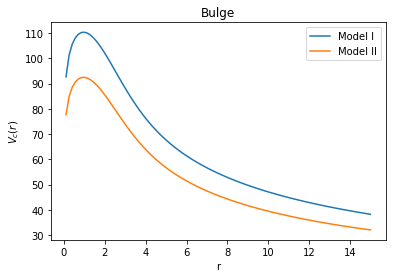

In [5]:
plt.plot(R,np.sqrt(Vc2_b(R,rho_b=rho_b_I)),label='Model I')
plt.plot(R,np.sqrt(Vc2_b(R,rho_b=rho_b_II)),label='Model II')
plt.xlabel('r')
plt.ylabel(r'$V_{c}(r)$')
plt.legend(loc='upper right', prop={'size':10})
plt.title('Bulge')

In [6]:
def M_minor(r,rho_sol,m_a):
    rsol = ((rho_sol/2.42e9)*(m_a/1.0e-22)**2.)**(-0.25)
    n = 3465.*r**13.*rsol + 23100.*r**11.*rsol**3. + 65373.*r**9.*rsol**5. + 101376.*r**7.*rsol**7. + 92323.*r**5.*rsol**9. + 48580.*r**3.*rsol**11. + 3465.*(r**2.+rsol**2.)**7.*np.arctan(r/rsol) - 3465.*r*rsol**13.
    d = (r**2. +rsol**2.)**7.
    const = 4.*np.pi*rho_sol*rsol**3./215040.
    return const*n/d

In [7]:
def M_mayor(r,rho_sol,m_a,eps,r_s):
    rsol = ((rho_sol/2.42e9)*(m_a/1.0e-22)**2.)**(-0.25)
    r_eps = rsol*np.sqrt(eps**(-1./8.) - 1.)
    delta_NFW = eps*r_eps*(r_s + r_eps)**2./r_s**3.
    t1 = np.log(r + r_s) + r_s/(r+r_s) -np.log(r_s +r_eps) - r_s/(r_s+r_eps)#- np.log(r_s) - 1.
    constant = 4.*np.pi*rho_sol*delta_NFW*r_s**3.
    n2 = 3465.*r_eps**13.*rsol + 23100.*r_eps**11.*rsol**3. + 65373.*r_eps**9.*rsol**5. + 101376.*r_eps**7.*rsol**7. + 92323.*r_eps**5.*rsol**9. + 48580.*r_eps**3.*rsol**11. + 3465.*(r_eps**2.+rsol**2.)**7.*np.arctan(r_eps/rsol) - 3465.*r_eps*rsol**13.
    d2 = (r_eps**2. +rsol**2.)**7.
    const2 = 4.*np.pi*rho_sol*rsol**3./215040.
    return constant*t1 + const2*n2/d2

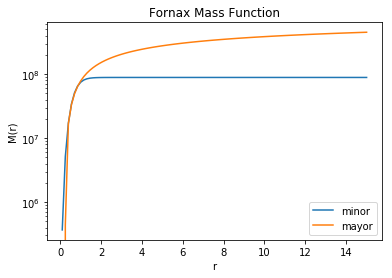

In [8]:
plt.plot(R,M_minor(R,rho_sol=0.037*rho_soliton,m_a=m_axion),label='minor')
plt.plot(R,M_mayor(R,rho_sol=0.037*rho_soliton,m_a=m_axion,eps=0.48,r_s=0.39),label='mayor')
plt.xlabel('r')
plt.ylabel('M(r)')
plt.yscale('log')
plt.title('Fornax Mass Function')
plt.legend(loc='lower right',prop={'size':10})

In [9]:
def vc2_DM_axion(r,rho_sol,m_a,eps,r_s):
    rsol = ((rho_sol/(2.42e9))*(m_a/1.0e-22)**2.)**(-0.25)
    r_eps = rsol*np.sqrt(eps**(-1./8.) - 1.)
    result = []
    for i in range(0,len(r)):
        if r[i]<r_eps:
            result.append(G*M_minor(r[i],rho_sol,m_a)/r[i])
        else:
            result.append(G*M_mayor(r[i],rho_sol,m_a,eps,r_s)/r[i])
    return np.array(result)

Text(0.5,1,'Dark Matter Axion Halo')

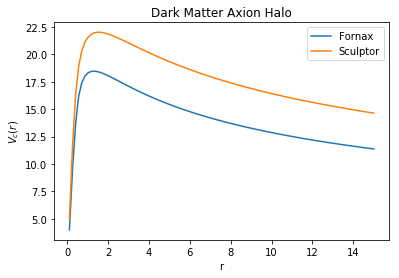

In [10]:
plt.plot(R,np.sqrt(vc2_DM_axion(R,rho_sol=0.037*rho_soliton,m_a=m_axion,eps=0.48,r_s=0.39)),label='Fornax')
plt.plot(R,np.sqrt(vc2_DM_axion(R,rho_sol=0.057*rho_soliton,m_a=m_axion,eps=0.464,r_s=0.57)),label='Sculptor')
plt.xlabel('r')
plt.ylabel(r'$V_{c}(r)$')
plt.legend(loc='upper right', prop={'size':10})
plt.title('Dark Matter Axion Halo')

In [11]:
def Vc2_SD_simps(R,R_d,Sigma_d_SD,z=0.,alpha_0=0.5,z1=1.,z0=0.3):
    def I_SD(zp,a,R):
        d = np.sqrt((a+R)**2. + (z-zp)**2.) + np.sqrt((a-R)**2. + (z-zp)**2.)
        u = (2.*a)/d
        t2 = u/np.sqrt(1-u**2.)
        t1 = (a+R)/(np.sqrt((a+R)**2. + (z-zp)**2.)) - (a-R)/(np.sqrt((a-R)**2. + (z-zp)**2.))
        g = -a*kn(0,a/R_d)*t2*t1/d
        f = (alpha_0*np.exp(-abs(zp)/z0))/(2.*z0) + np.exp(-abs(zp)/z1)/(2.*z1) - (alpha_0*np.exp(-abs(zp)/z1))/(2.*z1)
        return R*f*g
    Integral_SD_sims = []
    a_lims = np.linspace(0.1, 20.0,2*len(R))#200
    zp_lims = np.linspace(-20.0,20.0,4*len(R))#400
    fun_zp = np.zeros(len(zp_lims))
    for k in range(0,len(R)):
        for i in range(0,len(zp_lims)):
            fun_zp[i] = integrate.simps(I_SD(zp_lims[i],a_lims,R[k]),a_lims)
        result = integrate.simps(fun_zp,zp_lims)
        Integral_SD_sims.append(result)
    return -4.*G*Sigma_d_SD*np.array(Integral_SD_sims)/R_d

Text(0.5,1,'Stelar Disk')

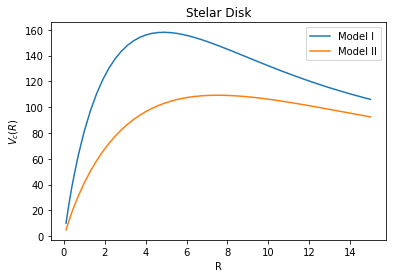

In [12]:
plt.plot(R,np.sqrt(Vc2_SD_simps(R,R_d=R_d_I,Sigma_d_SD=Sigma_d_SD_I)),label='Model I')
plt.plot(R,np.sqrt(Vc2_SD_simps(R,R_d=R_d_II,Sigma_d_SD=Sigma_d_SD_II)),label='Model II')
plt.xlabel('R')
plt.ylabel(r'$V_{c}(R)$')
plt.legend(loc='upper right', prop={'size':10})
plt.title('Stelar Disk')

In [13]:
def Vc2_ISM_ap(R,R_d,Sigma_g_ISM,R_m=R_m):
    def M_g_ISM(u,R):
        return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
    Integral_M_g = []
    for i in range (0,len(R)):
        result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
        Integral_M_g.append(result)
    return 2.*np.pi*Sigma_g_ISM*G*np.array(Integral_M_g)

Text(0.5,1,'Interestelar Medium')

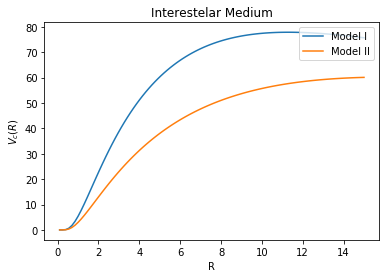

In [14]:
plt.plot(R,np.sqrt(Vc2_ISM_ap(R,R_d=R_d_I,Sigma_g_ISM=Sigma_g_ISM_I)),label='Model I')
plt.plot(R,np.sqrt(Vc2_ISM_ap(R,R_d=R_d_II,Sigma_g_ISM=Sigma_g_ISM_II)),label='Model II')
plt.xlabel('R')
plt.ylabel(r'$V_{c}(R)$')
plt.legend(loc='upper right', prop={'size':10})
plt.title('Interestelar Medium')

In [1]:
from scipy.optimize import minimize
import galkin
import galkin.processdata   # routines to process kinematic data
import galkin.readparsFile  # routines to read and check input parameters

In [2]:
#10.3, 15.3, 7.7from the paper
# Galactic parameters
R0=8.0# Galactocentric distance (kpc)
V0=230.# local circular velocity (km/s)
UsunINUSE=11.10# solar motion in the U-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
VsunINUSE=12.24# solar motion in the V-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
WsunINUSE=07.25# solar motion in the W-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
SYSTDISP=0.# systematic dispersion due to spiral arm streaming (km/s)

In [3]:
# Flags
flagPROPERMOTIONS=0	 			# proper motions not supported in current version - please keep at 0
flagHITERMINAL=0				# whether to use HI terminal velocities
flagFich89tab2=0				# whether to use Fich+ '89, ApJ 342, 272 (1989) (Table 2)
flagMalhotra95=0				# whether to use Malhotra '95, ApJ 448, 138 (1995)
flagMcClureGriffithsDickey07=0			# whether to use McClure-Griffiths & Dickey '07, ApJ 671, 427 (2007)
flagHITHICKNESS=0				# whether to use the HI thickness method
flagHonmaSofue97=0				# whether to use Honma & Sofue '97, PASJ 49, 453 (1997)
flagCOTERMINAL=1				# whether to use CO terminal velocities
flagBurtonGordon78=0				# whether to use Burton & Gordon '78, A&A 63, 7 (1978)
flagClemens85=0					# whether to use Clemens '85, ApJ 295, 422 (1985)
flagKnapp85=1					# whether to use Knapp+ '85, AJ 90, 2 (1985)
flagLuna06=0					# whether to use Luna+ '06, ApJ 641, 938 (2006)
flagHIIREGIONS=1				# whether to use HII regions
flagBlitz79=0					# whether to use Blitz '79, ApJL 231, L115 (1979)
flagFich89tab1=0				# whether to use Fich+ '89, ApJ 342, 272 (1989) (Table 1)	
flagTurbideMoffat93=0				# whether to use Turbide & Moffat '93, AJ 105, 5 (1993)
flagBrandBlitz93=0				# whether to use Brand & Blitz '93, A&A 275, 67 (1993)
flagHou09tabA1=1				# whether to use Hou+ '09, A&A 499, 473 (2009) (Table A1)
flagGMC=0					# whether to use giant molecular clouds
flagHou09tabA2=0				# whether to use Hou+ '09, A&A 499, 473 (2009) (Table A2)
##
flagOPENCLUSTERS=0				# whether to use open clusters
flagFrinchaboyMajewski08=0			# whether to use Frinchaboy & Majewski '08, AJ 136, 118 (2008)
flagPLANETARYNEBULAE=0				# whether to use planetary nebulae
flagDurand98=0					# whether to use Durand+ '98, A&AS 132, 13 (1998)
flagCEPHEIDS=1					# whether to use classical cepheids
flagPont94=1					# whether to use Pont+ '94, A&A 285, 415 (1994)
flagPont97=0					# whether to use Pont+ '97, A&A 318, 416 (1997)
flagCSTARS=0					# whether to use carbon stars
flagDemersBattinelli07=0			# whether to use Demers & Battinelli '07, A&A 473, 143 (2007)
flagBattinelli12=0				# whether to use Battinelli+ '12, Ap 56, 68 (2013)
###
flagMASERS=0					# whether to use masers
flagReid14=0					# whether to use Reid+ '14, ApJ 783, 130 (2014)
flagHonma12=0					# whether to use Honma+ '12, PASJ 64, 136 (2012)
flagStepanishchevBobylev11=0			# whether to use Stepanishchev & Bobylev '11, AstL 37, 4 (2011)
flagXu13=0					# whether to use Xu+ '13, ApJ 769, 15 (2013)
flagBobylevBajkova13=0				# whether to use Bobylev & Bajkova '13, AstL 39, 809 (2013)
##
flagastropy=0				 	# whether to use astropy for equatorial-to-galactic conversions

In [4]:
inputpars=(R0,V0,UsunINUSE,VsunINUSE,WsunINUSE,SYSTDISP, flagPROPERMOTIONS,flagHITERMINAL,flagFich89tab2,flagMalhotra95,flagMcClureGriffithsDickey07, flagHITHICKNESS,flagHonmaSofue97,flagCOTERMINAL,flagBurtonGordon78,flagClemens85,flagKnapp85,flagLuna06, flagHIIREGIONS,flagBlitz79,flagFich89tab1,flagTurbideMoffat93,flagBrandBlitz93,flagHou09tabA1, flagGMC,flagHou09tabA2,flagOPENCLUSTERS,flagFrinchaboyMajewski08,flagPLANETARYNEBULAE,flagDurand98,flagCEPHEIDS,flagPont94,flagPont97, flagCSTARS,flagDemersBattinelli07,flagBattinelli12, flagMASERS,flagReid14,flagHonma12,flagStepanishchevBobylev11,flagXu13,flagBobylevBajkova13,flagastropy)

In [5]:
galkin.readparsFile.CheckAndPrintParameters(inputpars)

checking validity of input parameters...
printing input parameters...
 R0=  8.0  kpc
 V0=  230.0  km/s
 (Usun,Vsun,Wsun) = ( 11.1 , 12.24 , 7.25 ) km/s
 systematic dispersion =  0.0  km/s
 use HI terminal velocities?            0
 use HI thickness method?               0
 use CO terminal velocities?            1
  use Burton & Gordon 78?                 0
  use Clemens 85?                         0
  use Knapp+ 85?                          1
  use Luna+ 06?                           0
 use HII regions?                       1
  use Blitz 79?                           0
  use Fich+ 89 (Table 1)?                 0
  use Turbide & Moffat 93?                0
  use Brand & Blitz 93?                   0
  use Hou+ 09 (Table A1)?                 1
 use giant molecular clouds?            0
 use open clusters?                     0
 use planetary nebulae?                 0
 use cepheids?                          1
  use Pont+ 94?                           1
  use Pont+ 97?                     

In [6]:
vecout=galkin.processdata.ProcessData(inputpars)
totallistvc=vecout[0]

processing CO terminal velocities...
 processing Knapp+ 85...
  selected  37  CO terminal velocities
processing HII regions...
 processing Hou+ 09 (Table A1)...
  selected  316  out of the total sample of  815  HII regions
processing classical cepheids...
 processing Pont+ 94...
  selected  245  out of the total sample of  278  cepheids


In [9]:
vecRp    = np.array([row[0] for row in totallistvc])# galactocentric distance [kpc]
vecerrRp = np.array([row[1] for row in totallistvc])# error in galactocentric distance [kpc]
vecvRp   = np.array([row[2] for row in totallistvc])# rotation velocity [km/s]
vecerrvRp= np.array([row[3] for row in totallistvc])# error in rotation velocity [km/s]

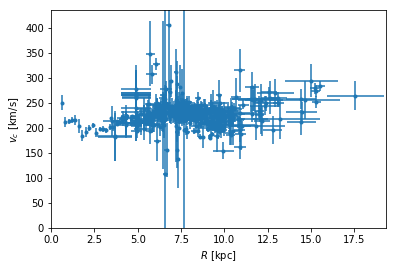

In [10]:
fig, ax1 = plt.subplots()
ax1.errorbar(vecRp, vecvRp, xerr=vecerrRp, yerr=vecerrvRp, fmt='.')
ax1.axis([0., max(vecRp)+0.1*(max(vecRp)-0.), min(0.,min(vecvRp)-0.1*(max(vecvRp)-min(vecvRp))) , max(vecvRp)+0.1*(max(vecvRp)-min(vecvRp))])
ax1.set_xlabel('$R$ [kpc]')
ax1.set_ylabel('$v_c$ [km/s]')
plt.savefig('Galkin_data.pdf')

Text(0,0.5,'$V_{c}(R)/km s^{-1}$')

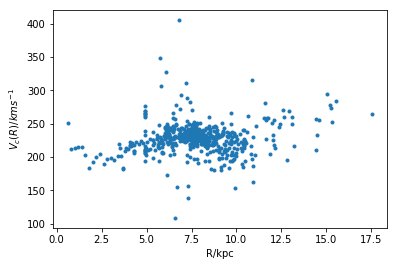

In [22]:
plt.plot(vecRp,vecvRp,'.')
plt.xlabel('R/kpc')
plt.ylabel(r'$V_{c}(R)/km s^{-1}$')

In [23]:
def Vc_tot_rho_sol(R,params,parameters):
    rho_sol = params
    rho_b,R_d,Sigma_d_SD,Sigma_g_ISM,eps,r_s,m_a = parameters
    suma = Vc2_b(R,rho_b) + vc2_DM_axion(R,rho_sol,m_a,eps,r_s) + Vc2_SD_simps(R,R_d,Sigma_d_SD) + Vc2_ISM_ap(R,R_d,Sigma_g_ISM)
    return np.sqrt(suma)

In [25]:
par_wo_rho_sol_I = np.array([rho_b_I,R_d_I,Sigma_d_SD_I,Sigma_g_ISM_I,0.4,0.3,m_axion])
par_wo_rho_sol_II = np.array([rho_b_II,R_d_II,Sigma_d_SD_II,Sigma_g_ISM_II,0.4,0.3,m_axion])

In [29]:
def Xi2_rho_sol_I(parameters):
    rho_sol = parameters
    par = np.exp(rho_sol)
    model = Vc_tot_rho_sol(vecRp,par,par_wo_rho_sol_I)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [45]:
x0_rho_sol_I = np.array(np.log(10000.0e7))

In [ ]:
LS_rho_sol_I = minimize(Xi2_rho_sol_I,x0_rho_sol_I,method='L-BFGS-B',bounds=((np.log(100.0e7),np.log(1000000.0e7)),))

In [ ]:
print LS_rho_sol_I

In [ ]:
print np.exp(LS_rho_sol_I.x)

In [ ]:
1000000003